# Example

The EdiHeadyTrack sample videos used here can be downloaded directly from the [Github](https://github.com/isDynamics/EdiHeadyTrack/tree/master/resources) or in the terminal using [wget](https://www.gnu.org/software/wget/).

Installing EdiHeadyTrack:

In [ ]:
!pip install EdiHeadyTrack

Importing the package (once installation is complete):

In [2]:
import EdiHeadyTrack as eht

Navigate to the directory from which video files will be accessed:

In [ ]:
import os
os.chdir('..')
print(os.getcwd())

Import video to perform tracking on and create a camera object:

In [4]:
video = eht.Video(filename='resources/high_speed_videos/theta_0_v_43.mp4')
camera = eht.Camera()

Perform head pose estimation on chosen video using chosen PoseDetectors from 'posedetector' module:

In [5]:
mediapipe = eht.MediaPipe(video=video, camera=camera)
tddfa = eht.TDDFA_V2(video=video, camera=camera)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


------------------------------------------------------------------------------------------------------------------------
Creating MediaPipe object for video resources/high_speed_videos/theta_0_v_43.mp4:                               16:01:01
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------
Video data:
------------------------------------------------------------
Video resolution: 1280 x 720 pixels
Length of video: 1178 frames
Framerate: 1200 fps
------------------------------------------------------------
Running MediaPipe Face Mesh on selected video...


100%|██████████| 1178/1178 [01:42<00:00, 11.46it/s]


Face tracking complete...
------------------------------------------------------------------------------------------------------------------------
MediaPipe object complete!                                                                                      16:02:45
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Creating TDDFA_v2 object for video resources/high_speed_videos/theta_0_v_43.mp4:                                16:02:45
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------
Video data:
------------------------------------------------------------
Video resolution: 1280 x 720 pixels
Length of video: 1178 frames
Framerate: 1200 fps
-----------------------------

100%|██████████| 1178/1178 [01:20<00:00, 14.54it/s]

Face tracking complete...
Dump to TDDFA_tracking.mp4
------------------------------------------------------------------------------------------------------------------------
3DDFA_v2 object complete!                                                                                       16:04:12
------------------------------------------------------------------------------------------------------------------------


Create filters to be applied to signals: 

In [6]:
filter = eht.Filter().low_pass_butterworth(fs=24000, lowcut=200, order=4)
filter_wax9 = eht.Filter().low_pass_butterworth(fs=2000, lowcut=200, order=4)

Create a Head object and apply the above filter:

In [7]:
head_MP = eht.Head(posedetector=mediapipe, id='MP').apply_filter(filter)
head_TDDFA = eht.Head(posedetector=tddfa, id='TDDFA').apply_filter(filter)

------------------------------------------------------------------------------------------------------------------------
Creating Head object for MediaPipe Face Detector with video resources/high_speed_videos/theta_0_v_43.mp4:            16:04:12
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Head object complete!                                                                                           16:04:12
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Creating Head object for <EdiHeadyTrack.posedetector.TDDFA_V2 object at 0x7f8a3142a040>:                        16:04:13
---------------------------

Load data from a chosen IMU using a class from the imu module:

In [8]:
wax9 = eht.Wax9(filename='resources/high_speed_wax9/theta_0_v_43.csv', time_offset=-7.82, id='WAX-9').apply_filter(filter_wax9)

Create a list of key times for showing video frames, and create a comparison plot:

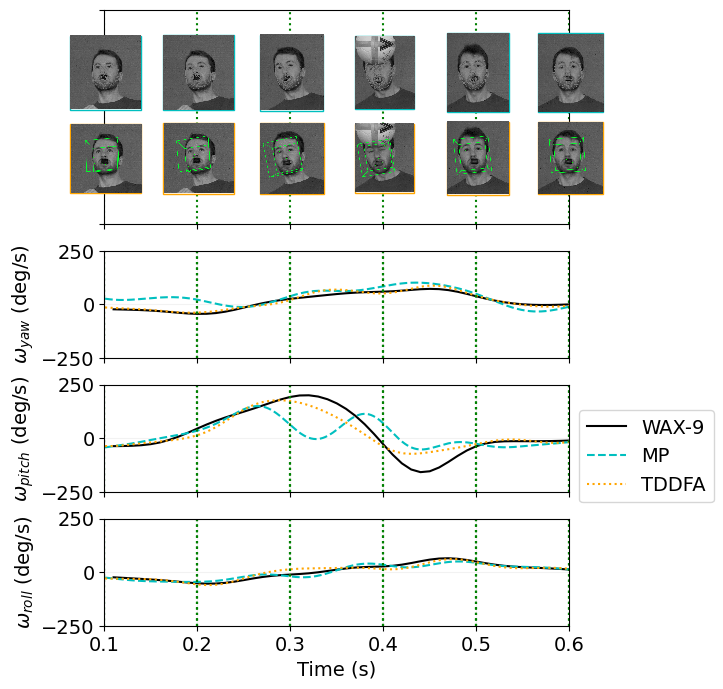

: 

In [11]:
key_times = [0.1,0.2,0.3,0.4,0.5,0.6]
plot = eht.Plot(wax9, head_MP, head_TDDFA).plot_property('velocity', xlim=(0.1,0.6), ylim=(-250,250), key_times=key_times)

Produce a table summarising the maximum values of each plot:

In [10]:
plot.summarise()

----------------------------------------------
WAX-9 plot summary
----------------------------------------------
yaw, velocity                            72.14
pitch, velocity                         200.48
roll, velocity                           64.86
----------------------------------------------
MP plot summary
----------------------------------------------
yaw, velocity                           101.28
pitch, velocity                          150.1
roll, velocity                           49.88
----------------------------------------------
TDDFA plot summary
----------------------------------------------
yaw, velocity                            87.29
pitch, velocity                         177.25
roll, velocity                           60.99
----------------------------------------------
